# General Stats
This notebook uses the pkl file created in [All Movies Analysis Basic](https://github.com/Data-Science-for-Linguists-2019/Animated-Movie-Gendered-Dialogue/blob/master/code/Analysis_code/All_Movies_Analysis_Basic.ipynb). In this file, character distributions by role and be gender are explored.

This file creates a pkl file which will be used in [POS Tags/Adj_Analysis](https://github.com/Data-Science-for-Linguists-2019/Animated-Movie-Gendered-Dialogue/blob/master/code/Analysis_code/POS_Analysis_All_Movies.ipynb)

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
all_char_df = pd.read_pickle(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\private\char_toks.pkl")

In [4]:
all_lines_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_movies_toktype.pkl")

In [5]:
all_lines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14096 entries, 0 to 14095
Data columns (total 14 columns):
Disney_Period       14096 non-null object
Gender              14096 non-null object
Movie               14096 non-null object
Role                14096 non-null object
Song                14096 non-null object
Speaker             14096 non-null object
Speaker_Status      14096 non-null object
Text                14096 non-null object
UTTERANCE_NUMBER    14096 non-null int64
Year                14096 non-null int64
Tokens              14096 non-null object
Types               14096 non-null object
Token_Count         14096 non-null int64
Type_Count          14096 non-null int64
dtypes: int64(4), object(10)
memory usage: 991.2+ KB


In [6]:
all_lines_df = all_lines_df[(all_lines_df.Song == 'D') & (all_lines_df.Token_Count > 0)]

In [7]:
all_lines_df.info() #13442! Should really save this....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13442 entries, 0 to 14095
Data columns (total 14 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
dtypes: int64(4), object(10)
memory usage: 1.0+ MB


In [8]:
all_lines_df.reset_index(drop=True, inplace=True)

In [9]:
#saving this....
all_lines_df.to_pickle(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\private\all_dialogue_toktypes.pkl")

In [10]:
all_char_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 11 columns):
Disney_Period       632 non-null object
Gender              632 non-null object
Movie               632 non-null object
Role                632 non-null object
Speaker             632 non-null object
Speaker_Status      632 non-null object
Total_Tok_Count     632 non-null float64
Total_Toks          632 non-null object
Total_Type_Count    632 non-null float64
Total_Types         632 non-null object
Year                632 non-null object
dtypes: float64(2), object(9)
memory usage: 32.1+ KB


# Number of Characters
There are 632 characters total. How are they distributed?
## By Gender

In [11]:
all_char_df['Gender'].value_counts()

m    354
f    139
n    139
Name: Gender, dtype: int64

In [12]:
char_by_gen = all_char_df['Gender'].value_counts()

In [13]:
tot = char_by_gen.sum()
tot

632

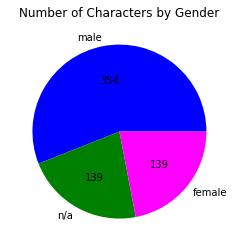

In [14]:
plt.pie(char_by_gen, labels = ['male', 'n/a', 'female'], colors=['blue', 'green', 'magenta'],
        autopct=lambda pct:'{:.0f}'.format((pct/100)*tot))
plt.title("Number of Characters by Gender")
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\num_char_by_gen")

In [15]:
#okay, so that's a general distribution. What about by line?
all_lines_df['Gender'].value_counts()

m    8914
f    4216
n     312
Name: Gender, dtype: int64

In [16]:
tot = all_lines_df['Gender'].value_counts().sum()
tot

13442

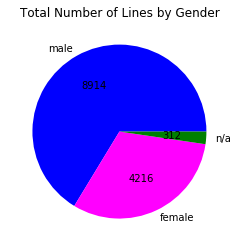

In [17]:
plt.pie(all_lines_df['Gender'].value_counts(), labels = ['male', 'female', 'n/a'], colors=['blue', 'magenta', 'green'],
       autopct=lambda pct:'{:.0f}'.format((pct/100)*tot), radius=1)
plt.title('Total Number of Lines by Gender')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\tot_lines_by_gen.png")

In [18]:
avg_lines_by_gen = all_lines_df['Gender'].value_counts() / all_char_df['Gender'].value_counts()
avg_lines_by_gen

m    25.180791
f    30.330935
n     2.244604
Name: Gender, dtype: float64

In [19]:
tot = avg_lines_by_gen.sum()
tot

57.7563305287973

In [20]:
import numpy as np

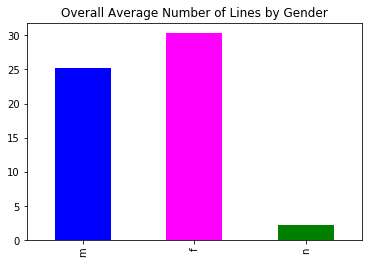

In [21]:
#plt.pie(avg_lines_by_gen, labels = ['female', 'male', 'n/a'], colors=['magenta', 'blue', 'green'], autopct=lambda pct:'{:.1f}'.format((pct/100)*tot)
avg_lines_by_gen.plot(kind='bar', color=['blue', 'magenta', 'green'])
plt.title("Overall Average Number of Lines by Gender")
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_num_lines_by_gen.png")
#in general, female characters average more lines

In [22]:
13442/632 #actual average number of lines

21.268987341772153

In [23]:
all_lines_df.groupby('Gender')['Token_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,4216.0,11.462049,13.554476,1.0,4.0,8.0,14.0,300.0
m,8914.0,12.481714,12.819819,1.0,5.0,9.0,16.0,290.0
n,312.0,9.333333,8.047554,1.0,4.0,7.0,12.0,48.0


In [24]:
from scipy import stats

In [25]:
stats.zscore(all_lines_df.groupby('Gender')['Token_Count'].mean())

array([ 0.28184979,  1.05925031, -1.3411001 ])

In [26]:
#just male/female
all_lines_df[all_lines_df.Gender != 'n'].groupby('Gender')['Token_Count'].mean()

Gender
f    11.462049
m    12.481714
Name: Token_Count, dtype: float64

In [27]:
stats.zscore(avg_lines_by_gen) #not to big of a difference

array([ 0.48561776,  0.90746567, -1.39308343])

## By Role
How are characters distributed by role?

In [28]:
all_char_df['Role'].value_counts()

N         406
HELPER    106
ANT        67
PRO        53
Name: Role, dtype: int64

In [29]:
char_by_role = all_char_df['Role'].value_counts()

In [30]:
tot = char_by_role.sum()
tot

632

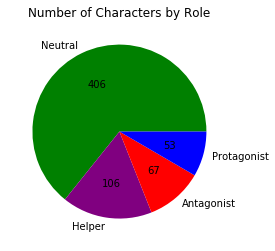

In [31]:
plt.pie(char_by_role, labels = ['Neutral', 'Helper', 'Antagonist', 'Protagonist'], colors=['green', 'purple', 'red', 'blue'],
        autopct=lambda pct:'{:.0f}'.format((pct/100)*tot))
plt.title("Number of Characters by Role")
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\num_char_by_role.png")

In [32]:
#okay, so that's a general distribution. Most characters are neutral. What about by line?
all_lines_df['Role'].value_counts()

PRO       5762
HELPER    3549
N         2094
ANT       2037
Name: Role, dtype: int64

In [33]:
tot = all_lines_df['Role'].value_counts().sum()
tot

13442

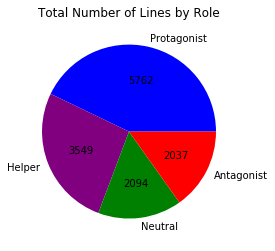

In [34]:
plt.pie(all_lines_df['Role'].value_counts(), labels = ['Protagonist', 'Helper', 'Neutral', 'Antagonist'], colors=['blue', 'purple', 'green', 'red'],
       autopct=lambda pct:'{:.0f}'.format((pct/100)*tot), radius=1)
plt.title('Total Number of Lines by Role')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\tot_lines_by_role.png")

In [35]:
#antagonists overall have the fewest lines...

In [36]:
avg_lines_by_role = all_lines_df['Role'].value_counts() / all_char_df['Role'].value_counts()
avg_lines_by_role

ANT        30.402985
HELPER     33.481132
N           5.157635
PRO       108.716981
Name: Role, dtype: float64

In [37]:
tot = avg_lines_by_role.sum()
print(tot)
print(tot/4)

177.75873375015433
44.439683437538584


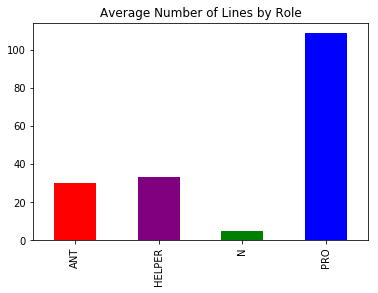

In [38]:
#plt.pie(avg_lines_by_role, labels = ['Antagonist', 'Helper', 'Neutral', 'Protagonist'], colors=['red','purple', 'green', 'blue'], autopct=lambda pct:'{:.1f}'.format((pct/100)*tot))
avg_lines_by_role.plot(kind='bar', color=['red', 'purple', 'green', 'blue'])
plt.title("Average Number of Lines by Role")
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_num_lines_by_role.png")

Overall, protagonists are getting the bulk of the lines...not really surprising

In [39]:
##can we do a double donut on role/gender distributions????
all_char_df.groupby('Gender')['Role'].value_counts(sort=True)

Gender  Role  
f       N          70
        HELPER     30
        PRO        27
        ANT        12
m       N         207
        HELPER     68
        ANT        54
        PRO        25
n       N         129
        HELPER      8
        ANT         1
        PRO         1
Name: Role, dtype: int64

In [40]:
vals2 = all_char_df['Gender'].value_counts().reindex(index = ['f', 'm', 'n'])
vals2

f    139
m    354
n    139
Name: Gender, dtype: int64

In [41]:
vals = all_char_df.groupby('Gender')['Role'].value_counts()
vals

Gender  Role  
f       N          70
        HELPER     30
        PRO        27
        ANT        12
m       N         207
        HELPER     68
        ANT        54
        PRO        25
n       N         129
        HELPER      8
        ANT         1
        PRO         1
Name: Role, dtype: int64

In [42]:
import numpy as np

c:\users\cassi\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


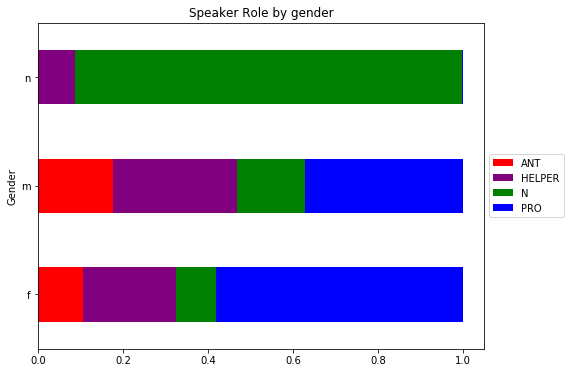

<Figure size 432x288 with 0 Axes>

In [43]:
roles_by_gender = all_lines_df.groupby('Gender').Role.value_counts(normalize=True)
roles_by_gender.unstack(level=1).plot.barh(figsize=(8,6), stacked=True, title="Speaker Role by gender",
                                           colors=['red', 'purple', 'green', 'blue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\speaker_role_by_gen.png")

In [44]:
all_dialogue_by_gender_role = all_lines_df[(all_lines_df.Gender != 'n') & (all_lines_df.Role != 'N')]

In [45]:
all_dialogue_by_gender_role.info() #now only 11320 entries!!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11320 entries, 0 to 13441
Data columns (total 14 columns):
Disney_Period       11320 non-null object
Gender              11320 non-null object
Movie               11320 non-null object
Role                11320 non-null object
Song                11320 non-null object
Speaker             11320 non-null object
Speaker_Status      11320 non-null object
Text                11320 non-null object
UTTERANCE_NUMBER    11320 non-null int64
Year                11320 non-null int64
Tokens              11320 non-null object
Types               11320 non-null object
Token_Count         11320 non-null int64
Type_Count          11320 non-null int64
dtypes: int64(4), object(10)
memory usage: 884.4+ KB


In [46]:
all_char_by_gen_role = all_char_df[(all_char_df.Gender != 'n') & (all_char_df.Role != 'N')]

In [47]:
all_char_by_gen_role.info() #now only 216 characters!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 631
Data columns (total 11 columns):
Disney_Period       216 non-null object
Gender              216 non-null object
Movie               216 non-null object
Role                216 non-null object
Speaker             216 non-null object
Speaker_Status      216 non-null object
Total_Tok_Count     216 non-null float64
Total_Toks          216 non-null object
Total_Type_Count    216 non-null float64
Total_Types         216 non-null object
Year                216 non-null object
dtypes: float64(2), object(9)
memory usage: 12.7+ KB


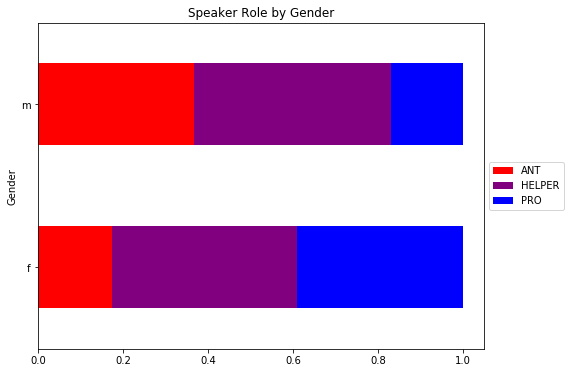

<Figure size 432x288 with 0 Axes>

In [48]:
roles_by_gender = all_char_by_gen_role.groupby('Gender').Role.value_counts(normalize=True)
roles_by_gender.unstack(level=1).plot.barh(figsize=(8,6), stacked=True, title="Speaker Role by Gender",
                                           colors=['red', 'purple', 'blue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\speaker_role_by_gen_2")

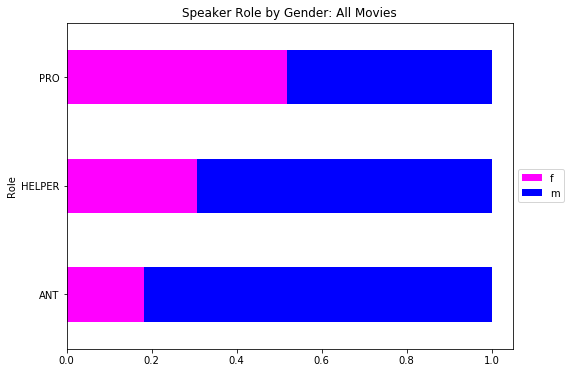

<Figure size 432x288 with 0 Axes>

In [49]:
roles_by_gender = all_char_by_gen_role.groupby('Role').Gender.value_counts(normalize=True)
roles_by_gender.unstack(level=1).plot.barh(figsize=(8,6), stacked=True, title="Speaker Role by Gender: All Movies",
                                           colors=['magenta', 'blue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\speaker_role_by_gen_all.png")

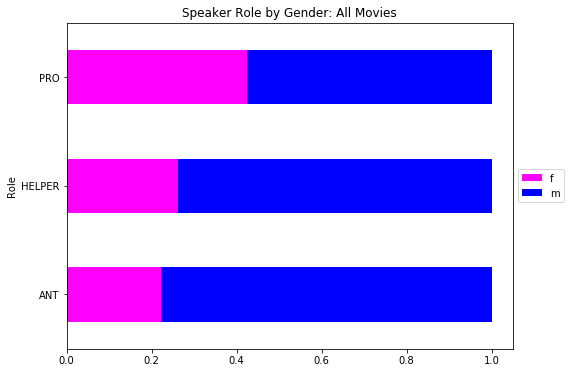

In [50]:
roles_by_gender = all_dialogue_by_gender_role.groupby(['Role']).Gender.value_counts(normalize=True)
roles_by_gender.unstack(level=1).plot.barh(figsize=(8,6), stacked=True, title="Speaker Role by Gender: All Movies",
                                           colors=['magenta','blue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [51]:
#let's split this by production company

In [52]:
dis_all_dialogue_by_gen_role = all_dialogue_by_gender_role[all_dialogue_by_gender_role.Disney_Period != 'DREAMWORKS']
dw_all_dialogue_by_gen_role = all_dialogue_by_gender_role[all_dialogue_by_gender_role.Disney_Period == 'DREAMWORKS']

In [53]:
print(dis_all_dialogue_by_gen_role.info())
print(dw_all_dialogue_by_gen_role.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5740 entries, 0 to 6785
Data columns (total 14 columns):
Disney_Period       5740 non-null object
Gender              5740 non-null object
Movie               5740 non-null object
Role                5740 non-null object
Song                5740 non-null object
Speaker             5740 non-null object
Speaker_Status      5740 non-null object
Text                5740 non-null object
UTTERANCE_NUMBER    5740 non-null int64
Year                5740 non-null int64
Tokens              5740 non-null object
Types               5740 non-null object
Token_Count         5740 non-null int64
Type_Count          5740 non-null int64
dtypes: int64(4), object(10)
memory usage: 448.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5580 entries, 6786 to 13441
Data columns (total 14 columns):
Disney_Period       5580 non-null object
Gender              5580 non-null object
Movie               5580 non-null object
Role                5580 non-nu

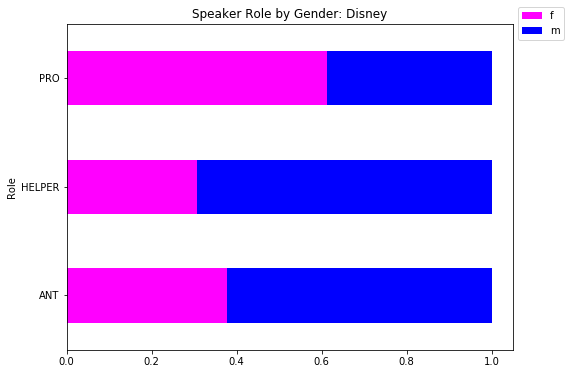

<Figure size 432x288 with 0 Axes>

In [54]:
dis_roles_by_gender = dis_all_dialogue_by_gen_role.groupby(['Role']).Gender.value_counts(normalize=True)
dis_roles_by_gender.unstack(level=1).plot.barh(figsize=(8,6), stacked=True, title="Speaker Role by Gender: Disney",
                                           colors=['magenta','blue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\speaker_role_by_gen_dis.png")

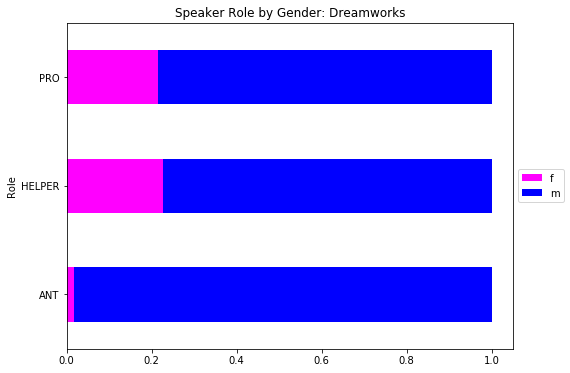

<Figure size 432x288 with 0 Axes>

In [55]:
dw_roles_by_gender = dw_all_dialogue_by_gen_role.groupby(['Role']).Gender.value_counts(normalize=True)
dw_roles_by_gender.unstack(level=1).plot.barh(figsize=(8,6), stacked=True, title="Speaker Role by Gender: Dreamworks",
                                           colors=['magenta','blue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\speaker_role_by_gen_dw.png")